# **CSE 7324 Lab 2: Exploring Image Data**
### *Thomas Adams, Suleiman Hijazeen, Nancy Le and Andrew Whigham*
------

### **1. Business Understanding**
------

### **2. Data Preparation**
------

In [12]:
# import dependencies

import sys
import os
from time import time
from time import sleep
from PIL import Image
import numpy as np
import pandas as pd
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from IPython.display import Image as _Imgdis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  

from PIL import Image

In [15]:
# helper functions to load and save images

def load_image(image):
    img = Image.open(image)
    img.load()
    npimage = np.asarray(img, dtype="int32")
    return npimage

def save_image(npimage, filename):
    img = Image.fromarray(np.asarray(np.clip(npimage, 0, 255), dtype="uint8"), "L")
    img.save(filename)


In [5]:
for root, dirs, files in os.walk('Data/Dataset/'):
    for file in files:
        print(file)

Working with 3000 images
Image examplesbefore converted to gray scale : 
H1034.jpg


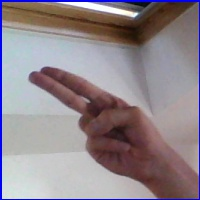

H1035.jpg


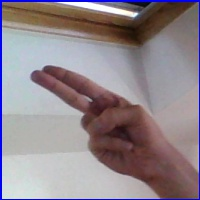

In [16]:
#show some images before converting it to gray scale 
folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/asl_alphabet_train/H"


onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examplesbefore converted to gray scale : ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [23]:
num_of_img=300 #number of images imported per file 
n_components = 800 # number of reduced features

In [17]:
from scipy import ndimage
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
x_flat = np.zeros((num_of_img*29,40000))
x_g= np.zeros((200,200))
# names of each file which represent the alphabet 
files=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

i=0
for d in range(0,28): #going through the 29 files and fitch images from there 
 folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/asl_alphabet_train"

 folder=folder+"/"+files[d]
 #onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
 onlyfiles = os.listdir(folder)

 train_files = []
 y_train = []

 f_n=0
 for _file in onlyfiles: #fitshing number of images from each file 
    train_files.append(_file) 
    f_n += 1
    if f_n>num_of_img:#limit the numbers of image per file 
        break
#    label_in_file = _file.find("_")
#    y_train.append(int(_file[label_in_file+1:-4]))
    
 print("Files in train_files: %d" % len(train_files))
 
 # Original Dimensions if any scaling is required 
 image_width = 200
 image_height = 200
 ratio = 1

 image_width = int(image_width / ratio)
 image_height = int(image_height / ratio)

 channels =3 #numbers of collors 
 nb_classes = 1

 dataset = np.ndarray(shape=(len(train_files),image_height, image_width,channels,),
                     dtype=np.float32)
 
 for _file in train_files:
    img = load_img(folder + "/"+ _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #img = img.convert('LA')
    x = img_to_array(img) 
    for k in range(0, 199):
     x_g[k]=((x[k][:,0])*0.299)+((x[k][:,1])*0.587)+((x[k][:,2])*0.114 ) #converting to graye scal
    x_flat[i]=x_g.ravel() #flaten each image to 1d matrix 
    # Normalize
    #x = (x - 128.0) / 128.0
   # dataset[i] = x
    i += 1
    if i % len(train_files) == 0:
        print("%d images to array" % i)
print("All images to array!")

Using TensorFlow backend.


Files in train_files: 301
301 images to array
Files in train_files: 301
602 images to array
Files in train_files: 301
903 images to array
Files in train_files: 301
1204 images to array
Files in train_files: 301
1505 images to array
Files in train_files: 301
1806 images to array
Files in train_files: 301
2107 images to array
Files in train_files: 301
2408 images to array
Files in train_files: 301
2709 images to array
Files in train_files: 301
3010 images to array
Files in train_files: 301
3311 images to array
Files in train_files: 301
3612 images to array
Files in train_files: 301
3913 images to array
Files in train_files: 301
4214 images to array
Files in train_files: 301
4515 images to array
Files in train_files: 301
4816 images to array
Files in train_files: 301
5117 images to array
Files in train_files: 301
5418 images to array
Files in train_files: 301
5719 images to array
Files in train_files: 301
6020 images to array
Files in train_files: 301
6321 images to array
Files in train_f

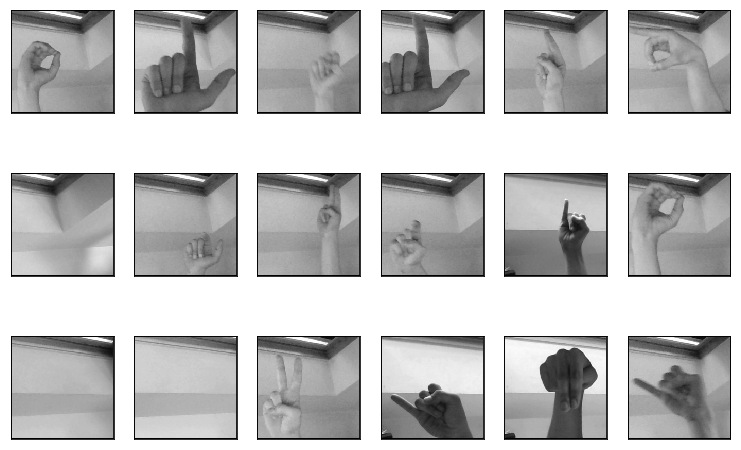

In [21]:

def plot_gallery(images,rnd, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[np.random.randint(rnd)].reshape((h, w)), cmap=plt.cm.gray)# pick radom images 
        plt.xticks(())
        plt.yticks(())

plot_gallery(x_flat,num_of_img*28, 200, 200) # number of totale images is number of files* number of images per file 

In [25]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfingers from %d images" % (
    n_components, x_flat.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x_flat.copy())
eigenfingers = pca.components_.reshape((n_components, 200, 200))

Extracting the top 800 eigenfingers from 8700 images


MemoryError: 

In [ ]:
eigenfingers.shape
plot_gallery(eigenfingers,n_components, 200, 200)

In [ ]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfingers from %d image" % (
    n_components, x_flat.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(x_flat.copy())
eigenfingers = rpca.components_.reshape((n_components, 200, 200))

In [ ]:
plot_gallery(eigenfingers, n_components, 200,200)

In [ ]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA


print ("Extracting the top %d eigenfingers from %d image, ALSO getting inverse transform" % (n_components,x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

In [ ]:
def plot_explained_variance(pca, ty):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title=ty), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca,"Principal components PCA")
plot_explained_variance(rpca,"Principal components PCA")
plot_explained_variance(kpca,"Principal components KPCA")

In [ ]:
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)

def mse(imageA, imageB):
 # the 'Mean Squared Error' between the two images is the
 # sum of the squared difference between the two images;
 # NOTE: the two images must have the same dimension
 err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
 err /= float(imageA.shape[0] * imageA.shape[1])
 
 # return the MSE, the lower the error, the more "similar"
 # the two images are
 return err
h=200
w=200

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    ssim = measure.compare_ssim(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image.reshape((h, w)))
    m = mse(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image.reshape((h, w)))
    plt.title("Full PCA %f ssim \n %f mse " % (ssim, m))
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    ssim = measure.compare_ssim(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image_rpca.reshape((h, w)))
    m = mse(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image.reshape_rpca((h, w)))
    plt.title("Randomized PCA %f ssim \n %f mse " % (ssim, m))
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    ssim = measure.compare_ssim(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image_kpca.reshape((h, w)))
    m = mse(x_flat[idx_to_reconstruct].reshape((h, w)),reconstructed_image.reshape_kpca((h, w)))
    plt.title("Kernel PCA %f ssim \n %f mse " % (ssim, m))
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,(num_of_img*29)-1,1),__manual=True)

### **3. Data Reduction**
------

### **4. Feature Extraction with ORB Key Point Matching**
------

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Data/Dataset/0/IMG_1118.JPG', 0)
img2 = cv2.imread('Data/Dataset/0/IMG_1128.JPG', 0)

# initiate STAR Detector
orb = cv2.ORB_create()

# find key points and compute descriptors
kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# draw keypoints location
kpimg = cv2.drawKeypoints(img, kp1, img, color=(255,0,0), flags=0)
plt.imshow(kpimg),plt.show()

# create brute force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# match descripters computed for each image
matches = bf.match(des1, des2)

# sort matches by distance
matches = sorted(matches, key=lambda x:x.distance)

# draw first 15 matches
img = cv2.drawMatches(img, kp1, img2, kp2, matches[:15], img, flags=0)
plt.imshow(img),plt.show()

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\features2d\src\draw.cpp:115: error: (-215) !outImage.empty() in function cv::drawKeypoints


### **5. References**
------